In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [61]:
# load the data
df=loadmat("ex7data2.mat")
# access array X elements from the dictionary
data = df["X"]
data

array([[ 1.84207953,  4.6075716 ],
       [ 5.65858312,  4.79996405],
       [ 6.35257892,  3.2908545 ],
       [ 2.90401653,  4.61220411],
       [ 3.23197916,  4.93989405],
       [ 1.24792268,  4.93267846],
       [ 1.97619886,  4.43489674],
       [ 2.23454135,  5.05547168],
       [ 2.98340757,  4.84046406],
       [ 2.97970391,  4.80671081],
       [ 2.11496411,  5.37373587],
       [ 2.12169543,  5.20854212],
       [ 1.5143529 ,  4.77003303],
       [ 2.16979227,  5.27435354],
       [ 0.41852373,  4.88312522],
       [ 2.47053695,  4.80418944],
       [ 4.06069132,  4.99503862],
       [ 3.00708934,  4.67897758],
       [ 0.66632346,  4.87187949],
       [ 3.1621865 ,  4.83658301],
       [ 0.51155258,  4.91052923],
       [ 3.1342801 ,  4.96178114],
       [ 2.04974595,  5.6241395 ],
       [ 0.66582785,  5.24399257],
       [ 1.01732013,  4.84473647],
       [ 2.17893568,  5.29758701],
       [ 2.85962615,  5.26041997],
       [ 1.30882588,  5.30158701],
       [ 0.99253246,

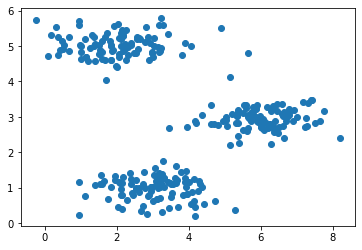

In [62]:
# visualize the data
plt.scatter(data[:,0],data[:,1])

In [68]:
data=pd.DataFrame(data)
data

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


In [70]:
# feature scaling on y axis
scaler = MinMaxScaler()
scaler.fit(data[[0]])
data[0]= scaler.transform(data[[0]])
scaler.fit(data[[1]])
data[1]= scaler.transform(data[[1]])
data

,0,1
0,0.247050,0.789060
1,0.698786,0.823548
2,0.780930,0.553025
3,0.372745,0.789891
4,0.411564,0.848632
...,...,...
295,0.893400,0.569034
296,0.856612,0.498568
297,0.600183,0.461381
298,0.753126,0.474850


In [72]:
data.describe()
# minimum value is 0, max is 1

,0,1
count,300.000000,300.000000
mean,0.465111,0.498574
std,0.227919,0.302067
min,0.000000,0.000000
25%,0.284231,0.180154
50%,0.411514,0.491877
75%,0.681139,0.824950
max,1.000000,1.000000


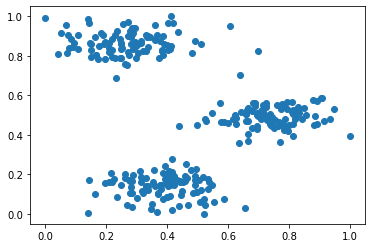

In [101]:
# no of clusters
# visualize the data
plt.scatter(data[[0]],data[[1]])

In [133]:
# elbow method to find the number of clusters
k_range = range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=3)
    km.fit(data[[0,1]])
    ykmeans=km.predict(data[[0,1]])
    sse.append(km.inertia_)


In [134]:
sse

[4.415103180649627,
 4.415103180649627,
 4.415103180649627,
 4.415103180649627,
 4.415103180649627,
 4.415103180649627,
 4.415103180649627,
 4.415103180649627,
 4.415103180649627]

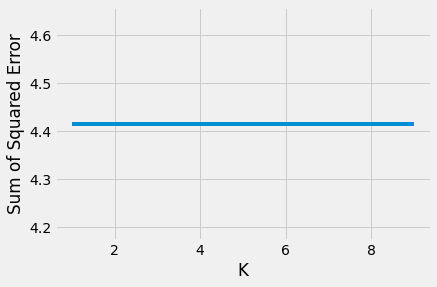

In [135]:
# plot the sse
plt.style.use("fivethirtyeight")
plt.xlabel("K")
plt.ylabel("Sum of Squared Error")
plt.plot(k_range,sse)

In [136]:
km.cluster_centers_

array([[0.26380446, 0.8648618 ],
       [0.73907964, 0.4954749 ],
       [0.38769638, 0.13908036]])

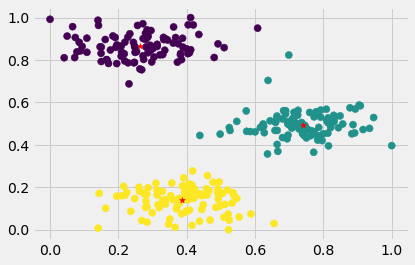

In [138]:
plt.scatter(data[[0]],data[[1]],c=ykmeans,s=50,cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='red',marker="*",label='centroid')